### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [208]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [209]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [210]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [211]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

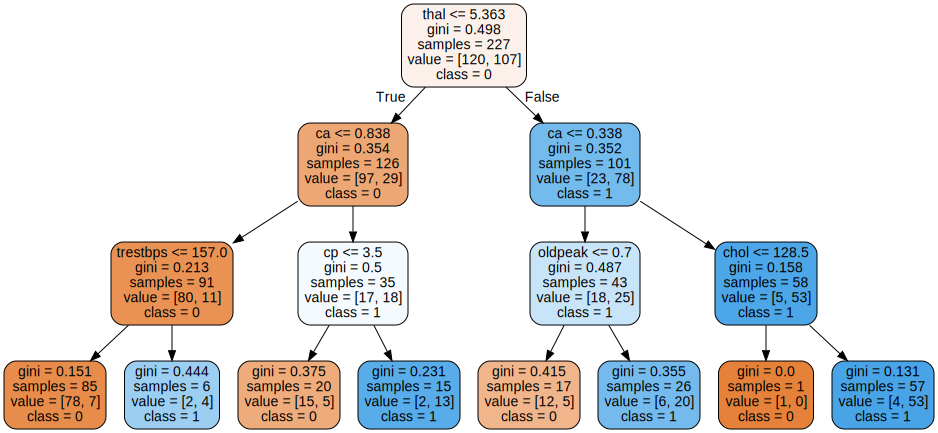

In [212]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [213]:
from sklearn.metrics import classification_report
ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.78      0.78      0.78        32

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [214]:
clf = DecisionTreeClassifier()
bagged_trees = BaggingClassifier(clf,n_estimators=100, max_samples=X_train.shape[0], max_features=5)
bagged_trees.fit(X_train, y_train)
ypred_bt = bagged_trees.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.78      0.78      0.78        32

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [215]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [216]:

params = {'max_depth': [3, 6, 9, 12], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}


gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [217]:
from sklearn.metrics import classification_report
ypred = gridcv.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.76      0.69      0.72        32

    accuracy                           0.78        76
   macro avg       0.77      0.76      0.77        76
weighted avg       0.78      0.78      0.77        76



In [230]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2)
clf.fit(X_train, y_train)
ypred_dt = clf.predict(X_test)
print(classification_report(y_test, ypred_dt))


              precision    recall  f1-score   support

           0       0.81      0.66      0.72        44
           1       0.62      0.78      0.69        32

    accuracy                           0.71        76
   macro avg       0.72      0.72      0.71        76
weighted avg       0.73      0.71      0.71        76



In [219]:
bagged_trees = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, max_samples=1.0, max_features=1.0,
    bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

bagged_trees.fit(X_train, y_train)
ypred_bt = bagged_trees.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.71      0.78      0.75        32

    accuracy                           0.78        76
   macro avg       0.77      0.78      0.77        76
weighted avg       0.78      0.78      0.78        76



In [226]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_depth=None, max_features='sqrt')
rf.fit(X_train, y_train)
ypred_rf = rf.predict(X_test)
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.78      0.78      0.78        32

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



**โมเดลที่ดีที่สุด**: Random Forest
คะแนนบน Test set:
f1_macro = 0.81, accuracy = 0.82


Model params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


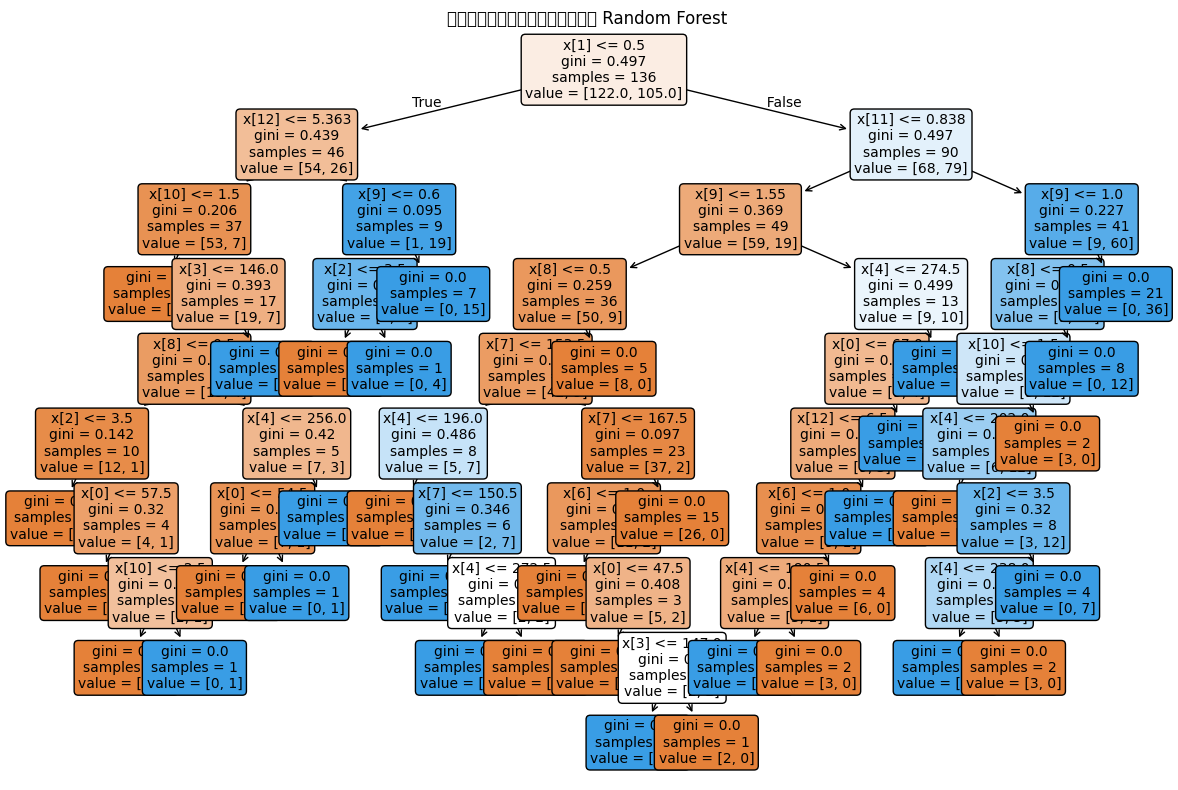

In [232]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print("Model params:", rf.get_params())

plt.figure(figsize=(12, 8))
plot_tree(
    rf.estimators_[0],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("ตัวแทนต้นไม้จาก Random Forest")
plt.tight_layout()
plt.show()


In [223]:

print("Best params (RF):", grid_rf.best_params_)


Best params (RF): {'clf__max_depth': 3, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


max_depth = 3 ต้นไม้ไม่ลึกเกินไป ลด overfitting
max_features = 'sqrt'  เพิ่มความหลากหลายของต้นไม้ โมเดลเสถียร
min_samples_split = 2 ให้ต้นไม้แตกละเอียดได้ แต่ถูกควบคุมด้วยความลึก
n_estimators = 100 จำนวนต้นไม้มากพอที่จะเฉลี่ยผลลัพธ์ให้แม่นยำ